In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 주피터 내장
%matplotlib inline
# 한글처리 
import platform
from matplotlib import font_manager, rc

# 한글처리
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
#     font_list_mac = fm.OSXInstalledFonts()
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Linux': # 리눅스
    rc( 'font', family='NanumGothic' )
elif platform.system() == 'Windows': # 윈도우
    # 폰트 차후 확인
    # fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family='NanumGothic' )
else:
    print('알수없는 시스템. 미적용')

In [46]:
maindata = pd.read_csv('./output/maindata.csv')

In [47]:
del maindata["평년"]
del maindata["현재일기"]

In [48]:
maindata.head()

,날짜,평균,현재기온,이슬점온도,체감온도,강수량,습도,풍향,풍속,해면기압,태풍
0,2015-01-02,1287,2.1,-15.4,-2.3,0.0,26.0,북서,17.6,1021.4,x
1,2015-01-05,1287,10.4,-3.3,10.4,0.0,38.0,서북서,2.9,1017.9,x
2,2015-01-06,1303,9.1,-16.2,6.7,11.5,15.0,북서,15.8,1011.3,x
3,2015-01-07,1277,2.5,-28.5,-1.6,0.0,8.0,북서,16.9,1018.0,x
4,2015-01-08,1352,3.3,-19.4,-0.1,0.0,17.0,북서,13.7,1022.8,x


In [49]:
maindata.shape

(1188, 11)

In [50]:
maindata.태풍.unique()

array(['x', 'o'], dtype=object)

In [51]:
maindata.loc[1].태풍

'x'

In [52]:
def tornado(tmp):
    if tmp == 'x':
        return 0
    else:
        return 3000

maindata['태풍'] = maindata['태풍'].apply(tornado)

In [54]:
maindata[maindata['태풍'] == 3000]

,날짜,평균,현재기온,이슬점온도,체감온도,강수량,습도,풍향,풍속,해면기압,태풍
121,2015-06-30,1888,20.7,20.3,69.0,4.0,98.0,남남서,4.0,1000.9,3000
122,2015-07-01,1881,26.4,19.0,75.0,0.1,64.0,남남동,16.6,996.4,3000
123,2015-07-02,1837,25.9,15.2,73.0,0.0,52.0,남남동,16.9,1002.7,3000
124,2015-07-03,1850,30.4,10.3,76.0,0.0,29.0,북서,6.5,1004.3,3000
125,2015-07-06,1957,24.7,16.1,72.0,0.0,59.0,남동,16.9,1011.7,3000
...,...,...,...,...,...,...,...,...,...,...,...
1119,2019-09-20,2020,26.3,14.7,73.0,0.0,49.0,남남동,6.8,1016.2,3000
1120,2019-09-23,2075,20.7,16.3,68.0,0.5,76.0,남남동,3.2,1015.0,3000
1125,2019-09-30,2068,29.3,22.7,80.0,0.0,68.0,남남동,11.9,1016.4,3000
1126,2019-10-01,2086,23.4,22.0,23.4,9.0,92.0,서북서,6.8,1020.2,3000


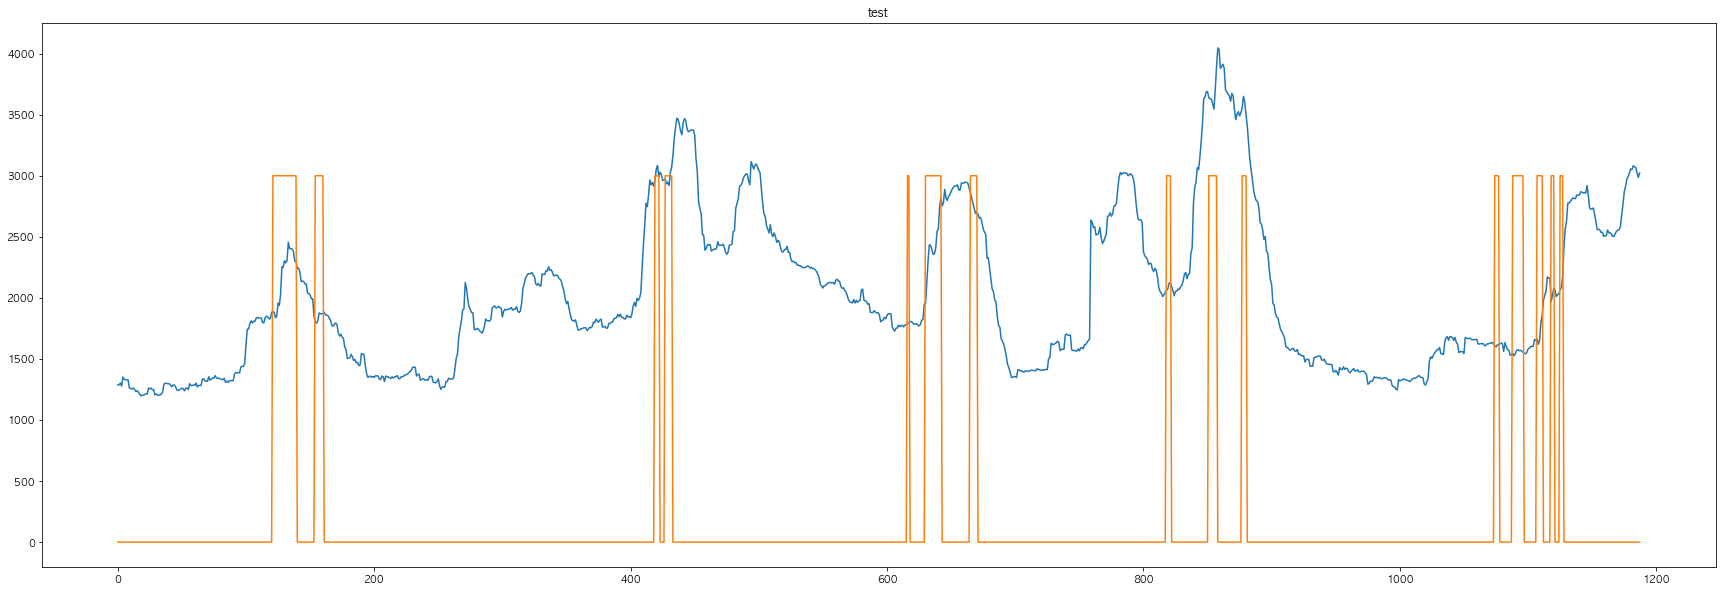

In [160]:
plt.rcParams['figure.figsize'] = [30, 10]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(maindata.평균)
ax.set_title('test')

ax.plot(maindata.태풍)

In [56]:
maindata.shape

(1188, 11)

날짜    2015-01-02
Name: 0, dtype: object
날짜    2016-03-16
Name: 296, dtype: object
날짜    2016-03-17
Name: 297, dtype: object
날짜    2017-05-30
Name: 593, dtype: object
날짜    2017-05-31
Name: 594, dtype: object
날짜    2018-10-17
Name: 890, dtype: object


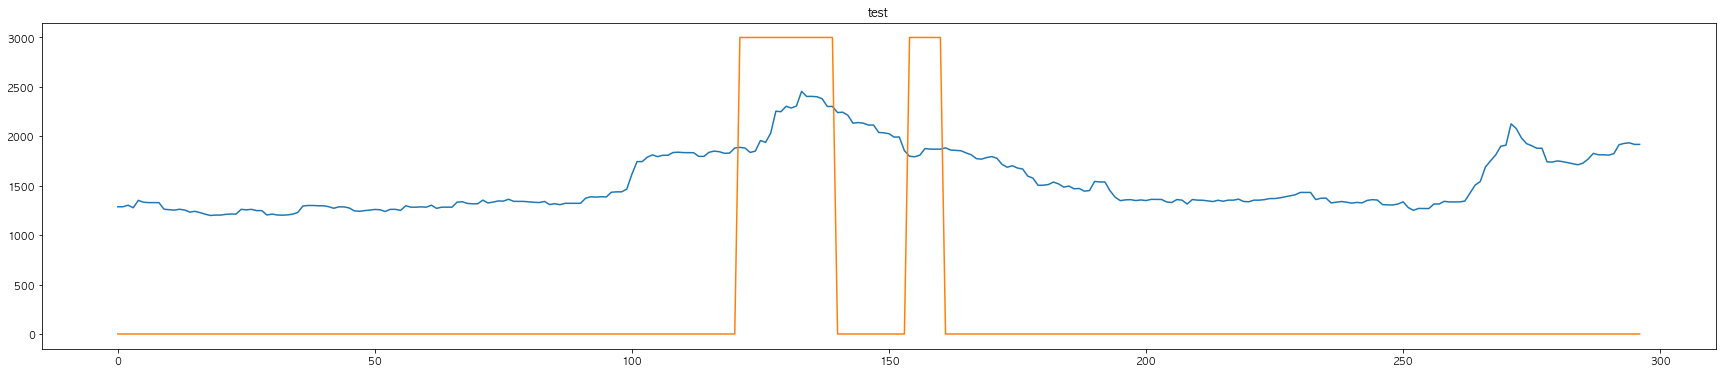

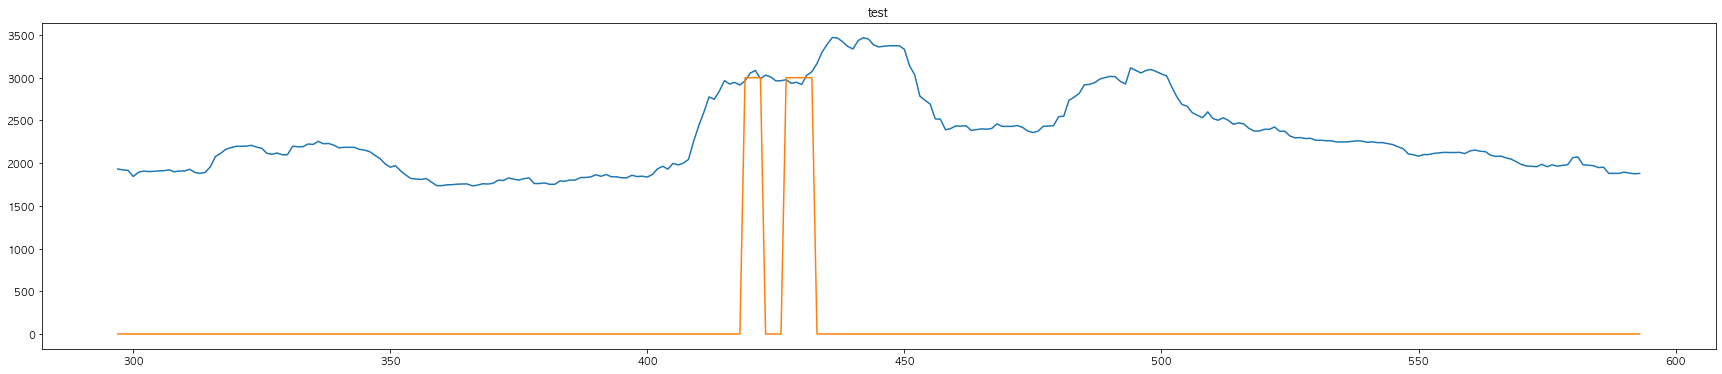

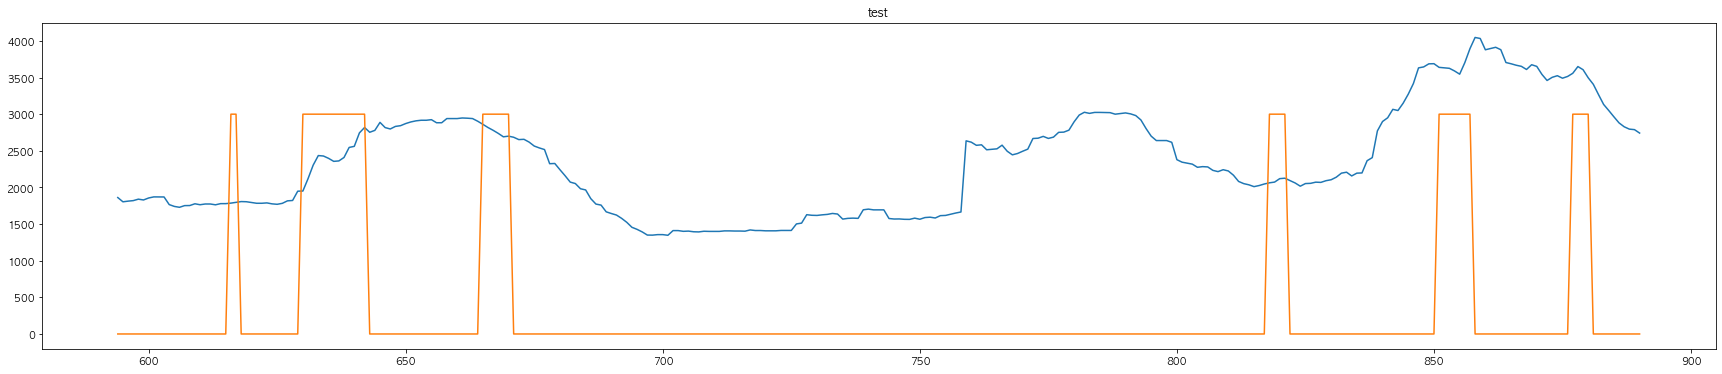

In [57]:
# 20일 ~ 10일로 해보자.

for i in range(0, 891, 297):
    df = maindata.iloc[i:i+297]
    
    print(df.iloc[0,[0]])
    print(df.iloc[-1,[0]])
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    ax.plot(df.평균)
    ax.set_title('test')

    ax.plot(df.태풍)

날짜    2017-06-09
Name: 600, dtype: object
날짜    2018-05-31
Name: 799, dtype: object


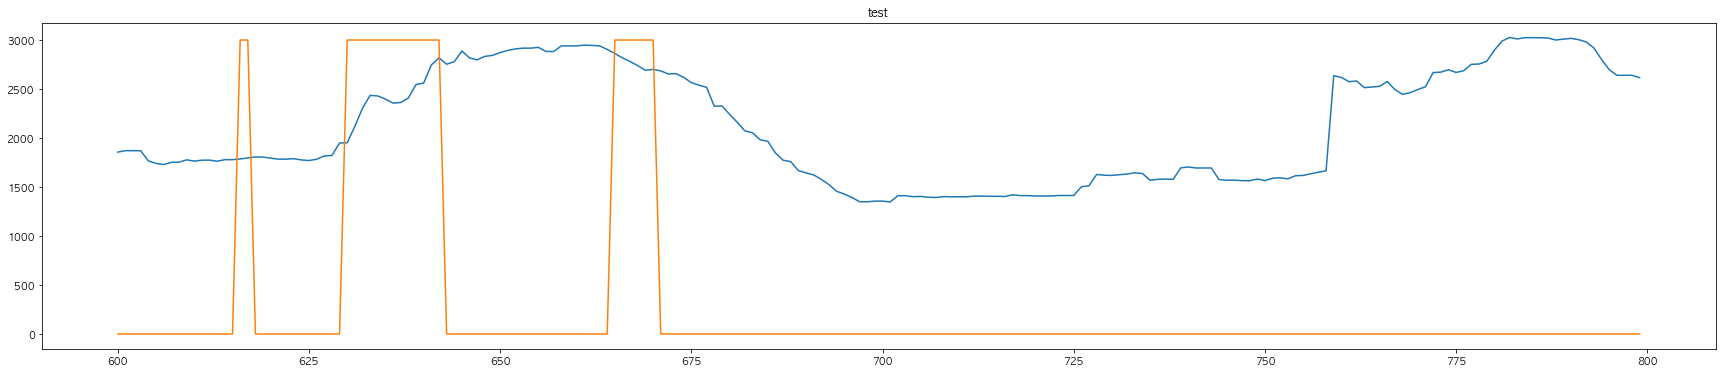

In [58]:

# df = maindata.iloc[0:200]

# df = maindata.iloc[200:400]

# df = maindata.iloc[400:600]

df = maindata.iloc[600:800]


print(df.iloc[0,[0]])
print(df.iloc[-1,[0]])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(df.평균)
ax.set_title('test')

ax.plot(df.태풍)

In [139]:
maindata = pd.read_csv('./output/maindata.csv')

In [ ]:
maindata

In [140]:
def tornado(tmp):
    if tmp == 'x':
        return 0
    else:
        return 3000

maindata['태풍'] = maindata['태풍'].apply(tornado)

In [141]:
def cal_torEffect(dataset, day):
    li = list()
    li.append('x')
    for i in range(1, dataset.shape[0]):
        if dataset.iloc[i].태풍 == 3000:
            li.append('o')
        else:
            li.append('x')
    
    for one in range(day):
        idx = list()
        for i in range(1, len(li)):
            if li[i] == 'o':
                pass
            elif li[i-1] == 'o':
                idx.append(i)
        for i in idx:
            li[i] = 'o'
        
    return li
            
    

In [ ]:
maindata.shape

In [ ]:
maindata.iloc[1187]

In [ ]:
len(cal_torEffect(maindata, 10))

In [142]:
maindata['태풍영향8'] = cal_torEffect(maindata, 8)
maindata['태풍영향10'] = cal_torEffect(maindata, 10)
maindata['태풍영향12'] = cal_torEffect(maindata, 12)
maindata['태풍영향14'] = cal_torEffect(maindata, 14)
maindata['태풍영향16'] = cal_torEffect(maindata, 16)
maindata['태풍영향18'] = cal_torEffect(maindata, 18)
maindata['태풍영향20'] = cal_torEffect(maindata, 20)

In [146]:
maindata[maindata.태풍영향20 == 'o']

,날짜,평균,평년,현재일기,현재기온,이슬점온도,체감온도,강수량,습도,풍향,풍속,해면기압,태풍,태풍영향8,태풍영향10,태풍영향12,태풍영향14,태풍영향16,태풍영향18,태풍영향20
121,2015-06-30,1888,1717,-,20.7,20.3,69.0,4.0,98.0,남남서,4.0,1000.9,3000,o,o,o,o,o,o,o
122,2015-07-01,1881,1716,-,26.4,19.0,75.0,0.1,64.0,남남동,16.6,996.4,3000,o,o,o,o,o,o,o
123,2015-07-02,1837,1720,-,25.9,15.2,73.0,0.0,52.0,남남동,16.9,1002.7,3000,o,o,o,o,o,o,o
124,2015-07-03,1850,1730,-,30.4,10.3,76.0,0.0,29.0,북서,6.5,1004.3,3000,o,o,o,o,o,o,o
125,2015-07-06,1957,1778,-,24.7,16.1,72.0,0.0,59.0,남동,16.9,1011.7,3000,o,o,o,o,o,o,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,2019-10-28,2858,1800,-,20.3,5.1,20.3,0.0,37.0,남서,12.2,1016.5,0,x,x,x,x,o,o,o
1144,2019-10-29,2862,1851,-,20.2,7.8,20.2,0.0,45.0,북서,8.3,1014.4,0,x,x,x,x,x,o,o
1145,2019-10-30,2858,1881,-,20.0,2.7,20.0,0.0,32.0,서북서,11.2,1020.0,0,x,x,x,x,x,o,o
1146,2019-10-31,2920,1824,-,21.0,5.7,21.0,0.0,37.0,북서,12.6,1019.6,0,x,x,x,x,x,x,o


In [147]:
maindata.to_csv('./output/maindata_torEffect.csv')

In [148]:
maindata['태풍영향22'] = cal_torEffect(maindata, 22)
maindata['태풍영향24'] = cal_torEffect(maindata, 24)
maindata['태풍영향26'] = cal_torEffect(maindata, 26)
maindata['태풍영향28'] = cal_torEffect(maindata, 28)
maindata['태풍영향30'] = cal_torEffect(maindata, 30)

In [149]:
maindata = pd.get_dummies(maindata, columns=['태풍영향22'], prefix='tor22')
maindata = pd.get_dummies(maindata, columns=['태풍영향24'], prefix='tor24')
maindata = pd.get_dummies(maindata, columns=['태풍영향26'], prefix='tor26')
maindata = pd.get_dummies(maindata, columns=['태풍영향28'], prefix='tor28')
maindata = pd.get_dummies(maindata, columns=['태풍영향30'], prefix='tor30')

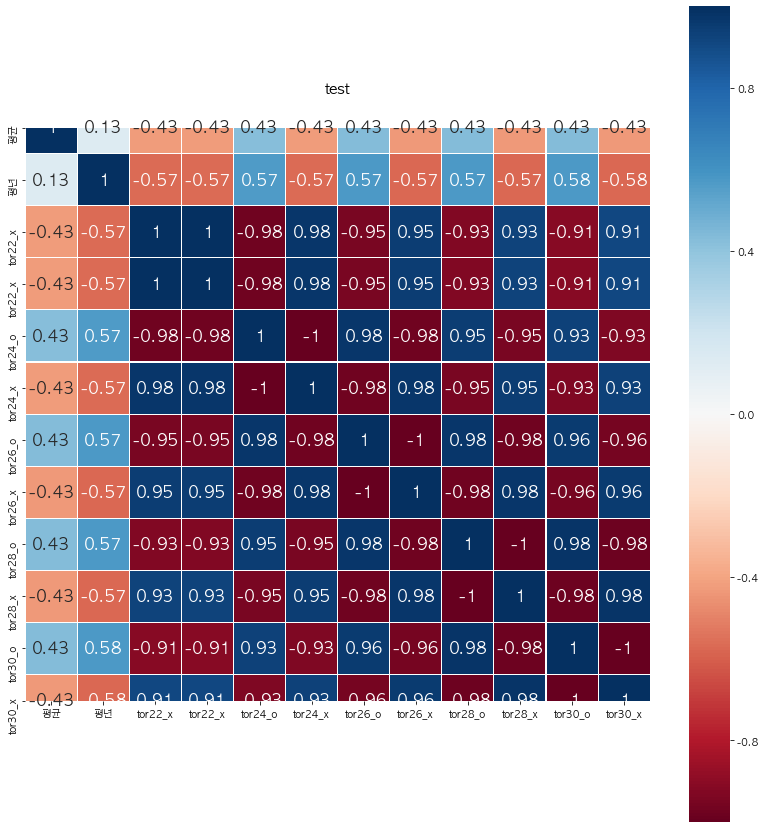

In [151]:
#  원핫
# 태풍 =>'tor_o' 'tor_x'
heatmap_data  = maindata[['평균','평년', 'tor22_x', 'tor22_x','tor24_o', 'tor24_x',
                      'tor26_o', 'tor26_x','tor28_o', 'tor28_x','tor30_o', 'tor30_x']]
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 15))
plt.title('test', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

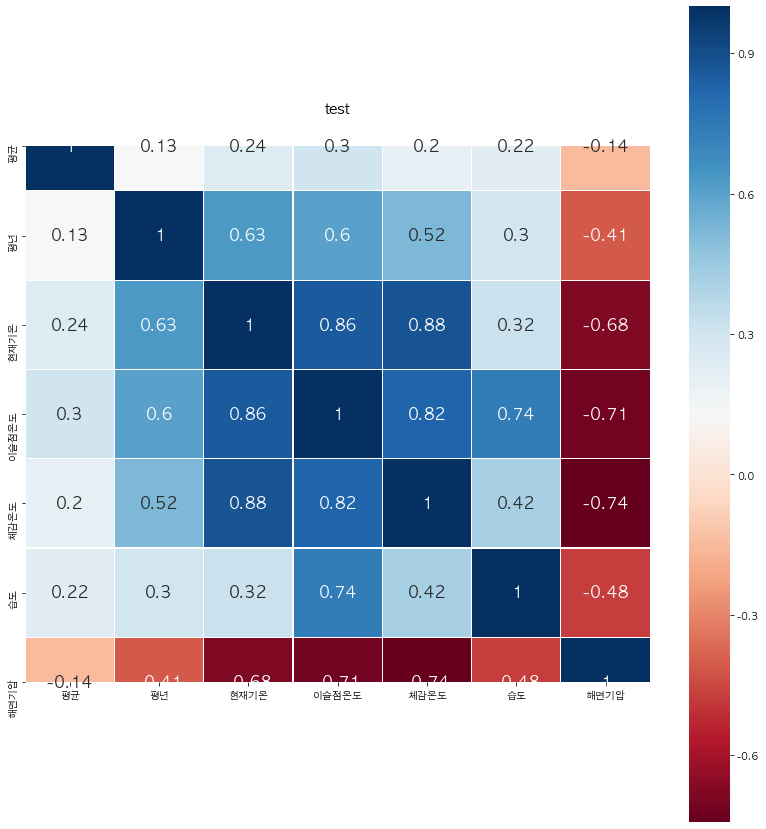

In [161]:
heatmap_data  = maindata[['평균', '평년','현재기온', '이슬점온도', '체감온도', '습도','해면기압']]

colormap = plt.cm.RdBu 
plt.figure(figsize=(14, 15))
plt.title('test', y=1.05, size=15)

sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

In [170]:
maindata = pd.get_dummies(maindata, columns=['태풍영향20'], prefix='tor20')

In [173]:
final_moo = maindata[['평균', '평년','현재기온', '이슬점온도', '체감온도', '습도','해면기압', 'tor20_o', 'tor20_x']]

In [174]:
final_moo.to_csv('./output/final_moo.csv', index=False)